In [2]:
import iris
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
import iris.quickplot as qplt
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
def load_temp(n):
    crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
    crut = iris.load(crut_file)
    temp = crut[0]
    for t in range(temp.data.shape[0]):
        temp.data[t] = temp.data[t] / max(temp.data[t].max(), -temp.data[t].min())
        temp.data[t].set_fill_value(temp.data[t].mean())
    return temp

temps = []
for i in range(1,11):
    temps.append(load_temp(i))
temps

/Users/admin/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)


[<iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>]

In [180]:
X = temps[0].data.filled().reshape(1995, 72*36)[1500:]

In [181]:
X.shape

(495, 2592)

In [182]:
def SubtractLinearRegress(series):
    lmodel = LinearRegression(fit_intercept=True)
#     print series
    s = series.reshape(series.shape[0], 1)
    r = np.arange(s.shape[0]).reshape(s.shape[0], 1)
    lmodel.fit(r, s)
#     print lmodel.coef_
#     warming = np.vectorize(lambda x: lmodel.predict(x))(np.arange(series.shape[0]))
    warming = lmodel.predict(r)
    return (s - warming).reshape(series.shape[0])

In [183]:
normedX = np.apply_along_axis(SubtractLinearRegress, 1, X.T)

In [184]:
normedX.shape

(2592, 495)

In [189]:
ind = 1000
print X.T[ind], normedX[ind]

[ -1.17346473e-01  -3.16597134e-01  -5.36274314e-02  -1.18314601e-01
  -2.66326349e-02  -5.96424118e-02   3.37130964e-01  -1.94129068e-02
   1.55891195e-01  -1.58797503e-01  -8.46559629e-02  -1.95110187e-01
  -4.39829051e-01  -3.09281796e-01  -3.11734471e-02  -1.50066197e-01
   3.09971403e-02  -1.01464204e-01   6.43281341e-02  -3.83257091e-01
  -4.05389726e-01  -2.31891856e-01  -6.90205097e-02   2.40486022e-03
  -7.80412257e-02  -7.83223584e-02  -9.24725756e-02   1.98511146e-02
  -4.74469624e-02  -2.80375510e-01  -6.63845539e-02  -7.52635226e-02
  -2.26752684e-01   9.78308264e-03   5.50593399e-02  -7.58569092e-02
   7.04561025e-02   3.17033902e-02   1.13587268e-01  -3.44967730e-02
   1.26205385e-01  -6.99413866e-02  -1.17321350e-02  -2.44325418e-02
  -3.84781629e-01  -1.99443102e-01  -1.44104943e-01  -7.61408955e-02
   7.71651417e-02  -1.63871720e-01  -7.41554946e-02   3.69740427e-02
  -3.79290292e-03   1.97179019e-01   2.94335987e-02   3.60387973e-02
   2.46711269e-01   1.94666870e-02

In [190]:
max(np.apply_along_axis(max, 0, normedX.T))

1.2664313995733851

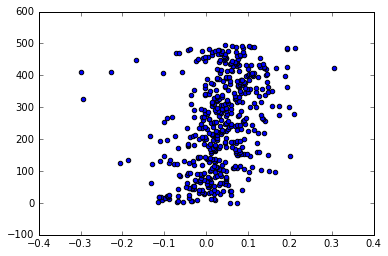

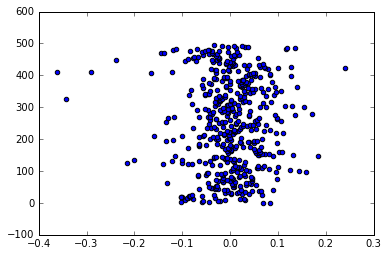

In [204]:
i = 1400
plt.scatter(X.T[i], np.arange(X.T[i].shape[0]))
plt.show()
plt.scatter(normedX[i], np.arange(normedX[i].shape[0]))
plt.show()